In [1]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as plcolor

In [2]:
def my_layout(G, scale=100):
    layout = {}
    for node in G.nodes():
        layout[node] = [G.nodes[node]['x'] / scale, G.nodes[node]['y'] / scale]
    return layout

In [3]:
cdict = {
    'red'   : [[0.0, 0.0, 0.0],
               [1.0, 0.0, 0.0]],
    'green' : [[0.0, 0.0, 0.0],
               [1.0, 0.0, 0.0]],
    'blue'  : [[0.0, 0.0, 0.0],
               [1.0, 0.0, 0.0]],
    'alpha' : [[0.0, 0.0, 0.0],
               [1.0, 1.0, 1.0]]
}
black_alpha = plcolor.LinearSegmentedColormap('black_alpha', cdict)

In [4]:
G = nx.DiGraph()
with open('2020_Problem_D_DATA/weight.csv') as f:
    f_csv = csv.DictReader(f)
    for row in f_csv:
        if int(row['MatchID']) is 1 and 'Huskies' in row['OriginID']:
            G.add_edge(row['OriginID'], row['DestinationID'], weight=int(row['Weight']))
            
        else:
            break

with open('2020_Problem_D_DATA/location.csv') as f:
    f_csv = csv.DictReader(f)
    for row in f_csv:
        if int(row['MatchID']) is 1 and 'Huskies' in row['OriginPlayerID']:
            G.nodes[row['OriginPlayerID']]['x'] = float(row['EventOrigin_x'])
            G.nodes[row['OriginPlayerID']]['y'] = float(row['EventOrigin_y'])
        else:
            break

In [5]:
weights = [G[u][v]['weight'] / 3 for u,v in G.edges()]
colors = [G[u][v]['weight'] / 18 for u,v in G.edges()]
sizes = [200 for n in G.nodes()]
pos = my_layout(G)
labels = {n:G.degree(n) for n in G.nodes()}

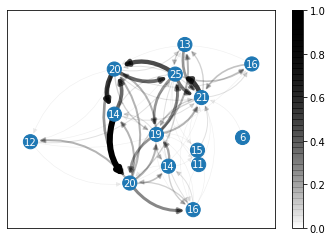

In [90]:
nodes_plot = nx.draw_networkx_nodes(G, pos = pos, node_size = sizes)
plt.plot()
edges_plot = nx.draw_networkx_edges(G, pos = pos, width = weights, connectionstyle = 'arc3,rad=0.3', edge_color=colors, edge_cmap=black_alpha)
labels_plot = nx.draw_networkx_labels(G, pos = my_layout(G), labels = labels, font_color = 'w', font_size = 10)
plt.colorbar(plt.cm.ScalarMappable(norm = plcolor.Normalize(0,1), cmap = black_alpha))

In [91]:
nx.write_graphml(G, '2020_Problem_D_DATA/H_1.graphml')